In [1]:
import os
from dotenv import load_dotenv 
load_dotenv("../../constants/.env")

api_key = os.environ.get('BINANCE_KEY')
secret_key = os.environ.get('BINANCE_SECRET')

In [2]:
import pandas as pd

In [3]:
pair='BTCUSDT'
granularity = '5m'

In [4]:
df = pd.read_pickle(f"crypto/{pair}_{granularity}.pkl")

In [5]:
pd.set_option('display.max_rows', None)

In [6]:
df.tail()

,Time,Open,High,Low,Close,Volume
192940,2024-10-31 23:40:00,70525.07,70559.34,70462.00,70476.00,87.33341
192941,2024-10-31 23:45:00,70476.01,70476.01,70422.00,70433.99,51.00845
192942,2024-10-31 23:50:00,70434.00,70443.69,70339.79,70346.00,154.34229
192943,2024-10-31 23:55:00,70346.00,70358.26,70292.00,70292.01,81.72139
192944,2024-11-01 00:00:00,70292.01,70354.77,70248.96,70349.67,107.43098


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

def analisar_distribuicao(df, coluna='Close', k=1, remover_outliers=True):
    """
    Analisa a distribuição normal das variações percentuais de preços e remove outliers, se necessário.
    
    Parâmetros:
        df (pd.DataFrame): DataFrame contendo os preços.
        coluna (str): Nome da coluna com os preços de fechamento.
        k (float): Fator multiplicador para definir os limites (kσ).
                   - Exemplo de valores e implicações:
                     - k=1: Captura aproximadamente 68% dos dados (limite ±1σ).
                     - k=2: Captura aproximadamente 95% dos dados (limite ±2σ).
                     - k=3: Captura aproximadamente 99.7% dos dados (limite ±3σ).
        remover_outliers (bool): Se True, remove valores fora dos limites definidos por kσ.
        
    Retorna:
        dict: Contendo média, desvio padrão e limites baseados na distribuição.
    """
    # Calcular variação percentual
    df['var_percentual'] = df[coluna].pct_change() * 100
    variacoes = df['var_percentual'].dropna()
    
    # Calcular média e desvio padrão
    media = variacoes.mean()
    desvio_padrao = variacoes.std()
    
    # Definir limites baseado no multiplicador k
    limite_alta = media + k * desvio_padrao
    limite_baixa = media - k * desvio_padrao
    
    # Remover outliers, se ativado
    if remover_outliers:
        variacoes = variacoes[(variacoes >= 5*limite_baixa) & (variacoes <= 5*limite_alta)]
    
    # Gerar dados para a curva normal
    x = np.linspace(variacoes.min(), variacoes.max(), 1000)
    curva = norm.pdf(x, media, desvio_padrao)
    
    # Plotar histograma e curva
    plt.figure(figsize=(10, 6))
    plt.hist(variacoes, bins=30, density=True, alpha=0.6, color='skyblue', label='Histograma')
    plt.plot(x, curva, color='red', label='Distribuição Normal')
    plt.axvline(media, color='black', linestyle='--', label='Média (μ)')
    plt.axvline(limite_alta, color='green', linestyle='--', label=f'+{k}σ ({limite_alta:.2f})')
    plt.axvline(limite_baixa, color='green', linestyle='--', label=f'-{k}σ ({limite_baixa:.2f})')
    plt.title('Distribuição Normal das Variações Percentuais')
    plt.xlabel('Variação Percentual (%)')
    plt.ylabel('Densidade')
    plt.legend()
    plt.show()
    
    # Retornar estatísticas
    return {
        'media': media,
        'desvio_padrao': desvio_padrao,
        'limite_alta': limite_alta,
        'limite_baixa': limite_baixa
    }


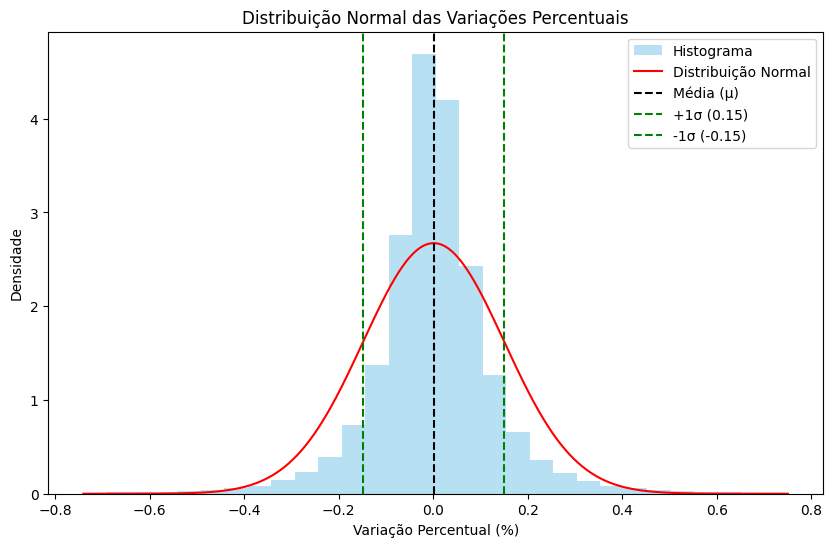

Resultados da Distribuição:
{'media': np.float64(0.0008620031206369862), 'desvio_padrao': np.float64(0.14927441253868215), 'limite_alta': np.float64(0.15013641565931912), 'limite_baixa': np.float64(-0.14841240941804518)}


In [8]:
resultados = analisar_distribuicao(df)
print("Resultados da Distribuição:")
print(resultados)

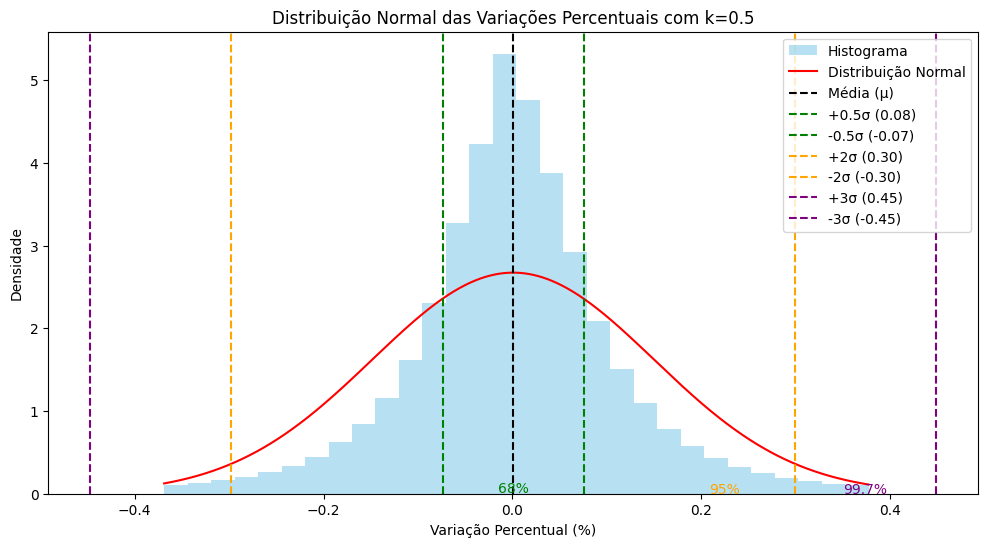

{'media': np.float64(0.0008620031206369862),
 'desvio_padrao': np.float64(0.14927441253868215),
 'limite_alta': np.float64(0.07549920938997806),
 'limite_baixa': np.float64(-0.07377520314870409)}

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

def analisar_distribuicao_e_plotar(df, coluna='Close', k=1, remover_outliers=True):
    """
    Analisa a distribuição normal das variações percentuais, inclui porcentagens no gráfico e remove outliers.
    
    Parâmetros:
        df (pd.DataFrame): DataFrame contendo os preços.
        coluna (str): Nome da coluna com os preços de fechamento.
        k (float): Fator multiplicador para definir os limites (kσ).
                   - Exemplo de valores e implicações:
                     - k=1: Captura aproximadamente 68% dos dados (limite ±1σ).
                     - k=2: Captura aproximadamente 95% dos dados (limite ±2σ).
                     - k=3: Captura aproximadamente 99.7% dos dados (limite ±3σ).
        remover_outliers (bool): Se True, remove valores fora dos limites definidos por kσ.
    """
    # Calcular variação percentual
    df['var_percentual'] = df[coluna].pct_change() * 100
    variacoes = df['var_percentual'].dropna()
    
    # Calcular média e desvio padrão
    media = variacoes.mean()
    desvio_padrao = variacoes.std()

    k=0.5
    # Definir limites baseado no multiplicador k
    limite_alta = media + k * desvio_padrao
    limite_baixa = media - k * desvio_padrao
    
    # Remover outliers, se ativado
    if remover_outliers:
        variacoes = variacoes[(variacoes >= 5*limite_baixa) & (variacoes <= 5*limite_alta)]
    
    # Gerar dados para a curva normal
    x = np.linspace(variacoes.min(), variacoes.max(), 1000)
    curva = norm.pdf(x, media, desvio_padrao)
    
    # Plotar histograma e curva
    plt.figure(figsize=(12, 6))
    plt.hist(variacoes, bins=30, density=True, alpha=0.6, color='skyblue', label='Histograma')
    plt.plot(x, curva, color='red', label='Distribuição Normal')
    
    # Adicionar linhas verticais para média e desvios padrão
    plt.axvline(media, color='black', linestyle='--', label='Média (μ)')
    plt.axvline(media + k * desvio_padrao, color='green', linestyle='--', label=f'+{k}σ ({limite_alta:.2f})')
    plt.axvline(media - k * desvio_padrao, color='green', linestyle='--', label=f'-{k}σ ({limite_baixa:.2f})')
    plt.axvline(media + 2 * desvio_padrao, color='orange', linestyle='--', label=f'+2σ ({media + 2 * desvio_padrao:.2f})')
    plt.axvline(media - 2 * desvio_padrao, color='orange', linestyle='--', label=f'-2σ ({media - 2 * desvio_padrao:.2f})')
    plt.axvline(media + 3 * desvio_padrao, color='purple', linestyle='--', label=f'+3σ ({media + 3 * desvio_padrao:.2f})')
    plt.axvline(media - 3 * desvio_padrao, color='purple', linestyle='--', label=f'-3σ ({media - 3 * desvio_padrao:.2f})')
    
    # Adicionar texto explicativo das porcentagens
    plt.text(media, 0.02, f"68%", color='green', fontsize=10, ha='center')
    plt.text(media + 1.5 * desvio_padrao, 0.01, "95%", color='orange', fontsize=10, ha='center')
    plt.text(media + 2.5 * desvio_padrao, 0.005, "99.7%", color='purple', fontsize=10, ha='center')
    
    # Configurar título e legendas
    plt.title(f'Distribuição Normal das Variações Percentuais com k={k}')
    plt.xlabel('Variação Percentual (%)')
    plt.ylabel('Densidade')
    plt.legend()
    plt.show()
    
    # Retornar estatísticas
    return {
        'media': media,
        'desvio_padrao': desvio_padrao,
        'limite_alta': limite_alta,
        'limite_baixa': limite_baixa
    }


# Exemplo de uso
# Suponha que você tenha um DataFrame `df` com uma coluna 'Close'
analisar_distribuicao_e_plotar(df)


In [10]:
df.head()

,Time,Open,High,Low,Close,Volume,var_percentual
0,2023-01-01 00:00:00,16541.77,16544.76,16527.51,16535.38,486.60903,NaN
1,2023-01-01 00:05:00,16534.91,16540.43,16522.55,16526.67,391.19043,-0.052675
2,2023-01-01 00:10:00,16526.67,16530.87,16520.00,16520.69,294.73889,-0.036184
3,2023-01-01 00:15:00,16521.26,16537.73,16517.72,16534.94,481.18777,0.086255
4,2023-01-01 00:20:00,16534.94,16540.66,16532.33,16535.54,309.53189,0.003629


In [11]:
def classificar_variacao_com_distribuicao(var, media, desvio_padrao):
    limite_alta = media + 0.5*desvio_padrao
    limite_baixa = media - 0.5*desvio_padrao
    
    if var > limite_alta:
        return "Alta"
    elif var < limite_baixa:
        return "Baixa"
    else:
        return "Estavel"

# Aplicar classificação ao DataFrame
media = resultados['media']
desvio_padrao = resultados['desvio_padrao']
df['classificacao'] = df['var_percentual'].apply(
    lambda var: classificar_variacao_com_distribuicao(var, media, desvio_padrao)
)


In [12]:
df.head()

,Time,Open,High,Low,Close,Volume,var_percentual,classificacao
0,2023-01-01 00:00:00,16541.77,16544.76,16527.51,16535.38,486.60903,NaN,Estavel
1,2023-01-01 00:05:00,16534.91,16540.43,16522.55,16526.67,391.19043,-0.052675,Estavel
2,2023-01-01 00:10:00,16526.67,16530.87,16520.00,16520.69,294.73889,-0.036184,Estavel
3,2023-01-01 00:15:00,16521.26,16537.73,16517.72,16534.94,481.18777,0.086255,Alta
4,2023-01-01 00:20:00,16534.94,16540.66,16532.33,16535.54,309.53189,0.003629,Estavel


In [13]:
df.classificacao.value_counts()

classificacao
Estavel    114245
Alta        39568
Baixa       39132
Name: count, dtype: int64

In [14]:
def criar_tuplas(df, coluna='classificacao'):
    """
    Cria tuplas de 3 estados consecutivos e adiciona os 2 próximos estados como alvo.

    Parâmetros:
        df (pd.DataFrame): DataFrame contendo os dados classificados.
        coluna (str): Nome da coluna com as classificações (Alta, Baixa).

    Retorna:
        list: Lista de tuplas no formato [(estado_atual, alvo), ...].
    """
    estados = df[coluna].values
    tuplas = []

    for i in range(len(estados) - 3):  # Garantir que há espaço para o estado atual e os 2 próximos
        estado_atual = (estados[i], estados[i + 1])
        alvo = (estados[i + 2], estados[i + 3])  # Próximos 2 estados
        tuplas.append((estado_atual, alvo))

    return tuplas



In [15]:
# Criar as tuplas
tuplas_teste = criar_tuplas(df, coluna='classificacao')
len(tuplas_teste)

192942

In [16]:
df['tuplas'] = [None] * len(df)  # Inicializar a coluna com None
tt = [None]+tuplas_teste+[None,None]
df['tuplas'] = tt  # Preencher as tuplas a partir da 3ª linha (índice 2)
df.dropna(inplace=True)
df.shape

(192942, 9)

In [17]:
df.head(10)

,Time,Open,High,Low,Close,Volume,var_percentual,classificacao,tuplas
1,2023-01-01 00:05:00,16534.91,16540.43,16522.55,16526.67,391.19043,-0.052675,Estavel,"((Estavel, Estavel), (Estavel, Alta))"
2,2023-01-01 00:10:00,16526.67,16530.87,16520.00,16520.69,294.73889,-0.036184,Estavel,"((Estavel, Estavel), (Alta, Estavel))"
3,2023-01-01 00:15:00,16521.26,16537.73,16517.72,16534.94,481.18777,0.086255,Alta,"((Estavel, Alta), (Estavel, Estavel))"
4,2023-01-01 00:20:00,16534.94,16540.66,16532.33,16535.54,309.53189,0.003629,Estavel,"((Alta, Estavel), (Estavel, Baixa))"
5,2023-01-01 00:25:00,16535.54,16545.70,16534.62,16544.19,311.90922,0.052312,Estavel,"((Estavel, Estavel), (Baixa, Estavel))"
6,2023-01-01 00:30:00,16544.19,16544.61,16522.03,16527.83,394.57703,-0.098887,Baixa,"((Estavel, Baixa), (Estavel, Estavel))"
7,2023-01-01 00:35:00,16527.27,16530.09,16508.39,16524.04,612.13471,-0.022931,Estavel,"((Baixa, Estavel), (Estavel, Alta))"
8,2023-01-01 00:40:00,16524.83,16525.25,16512.70,16515.43,358.94459,-0.052106,Estavel,"((Estavel, Estavel), (Alta, Estavel))"
9,2023-01-01 00:45:00,16515.91,16535.66,16515.43,16529.16,357.27214,0.083134,Alta,"((Estavel, Alta), (Estavel, Estavel))"
10,2023-01-01 00:50:00,16529.69,16533.79,16526.36,16531.84,176.35220,0.016214,Estavel,"((Alta, Estavel), (Estavel, Estavel))"


In [18]:
# Criar as tuplas
tuplas_teste = criar_tuplas(df, coluna='classificacao')

# Contar frequência de cada tupla
from collections import Counter
tupla_frequencias = Counter(tuplas_teste)

# Exibir as tuplas mais frequentes
print("Tuplas mais frequentes:")
for tupla, frequencia in tupla_frequencias.most_common(100):
    print(f"{tupla}: {frequencia}")


Tuplas mais frequentes:
(('Estavel', 'Estavel'), ('Estavel', 'Estavel')): 44665
(('Estavel', 'Estavel'), ('Estavel', 'Baixa')): 6197
(('Baixa', 'Estavel'), ('Estavel', 'Estavel')): 6146
(('Alta', 'Estavel'), ('Estavel', 'Estavel')): 6141
(('Estavel', 'Baixa'), ('Estavel', 'Estavel')): 6138
(('Estavel', 'Estavel'), ('Baixa', 'Estavel')): 6130
(('Estavel', 'Estavel'), ('Estavel', 'Alta')): 6090
(('Estavel', 'Alta'), ('Estavel', 'Estavel')): 6031
(('Estavel', 'Estavel'), ('Alta', 'Estavel')): 6001
(('Alta', 'Baixa'), ('Estavel', 'Estavel')): 2380
(('Baixa', 'Alta'), ('Estavel', 'Estavel')): 2296
(('Estavel', 'Alta'), ('Baixa', 'Estavel')): 2279
(('Estavel', 'Baixa'), ('Alta', 'Estavel')): 2212
(('Estavel', 'Estavel'), ('Baixa', 'Alta')): 2192
(('Estavel', 'Estavel'), ('Alta', 'Baixa')): 2149
(('Baixa', 'Estavel'), ('Alta', 'Estavel')): 2124
(('Alta', 'Estavel'), ('Baixa', 'Estavel')): 2121
(('Estavel', 'Alta'), ('Estavel', 'Baixa')): 2022
(('Baixa', 'Estavel'), ('Estavel', 'Baixa')): 2010

In [19]:
df.tail()

,Time,Open,High,Low,Close,Volume,var_percentual,classificacao,tuplas
192938,2024-10-31 23:30:00,70620.57,70642.00,70580.61,70584.52,39.65350,-0.051033,Estavel,"((Estavel, Estavel), (Baixa, Estavel))"
192939,2024-10-31 23:35:00,70584.52,70654.76,70518.00,70525.07,60.78634,-0.084225,Baixa,"((Estavel, Baixa), (Estavel, Estavel))"
192940,2024-10-31 23:40:00,70525.07,70559.34,70462.00,70476.00,87.33341,-0.069578,Estavel,"((Baixa, Estavel), (Estavel, Baixa))"
192941,2024-10-31 23:45:00,70476.01,70476.01,70422.00,70433.99,51.00845,-0.059609,Estavel,"((Estavel, Estavel), (Baixa, Baixa))"
192942,2024-10-31 23:50:00,70434.00,70443.69,70339.79,70346.00,154.34229,-0.124925,Baixa,"((Estavel, Baixa), (Baixa, Alta))"


In [20]:
from sklearn.model_selection import train_test_split

# Divisão do DataFrame
df_treino, df_teste = train_test_split(df, test_size=0.3, shuffle=False)

# Criar tuplas de 3 estados para treinamento e teste
tuplas_treino = criar_tuplas(df_treino)
tuplas_teste = criar_tuplas(df_teste)


In [21]:
def montar_matriz_transicao(tuplas):
    """
    Monta a matriz de transição baseada em tuplas com 3 estados e 2 estados como alvo.

    Parâmetros:
        tuplas (list): Lista de tuplas no formato [(estado_atual, alvo), ...].

    Retorna:
        dict: Matriz de transição representada como um dicionário.
    """
    # Criar dicionário para contar as transições
    transicoes = {}
    for estado_atual, alvo in tuplas:
        if estado_atual not in transicoes:
            transicoes[estado_atual] = {}
        if alvo not in transicoes[estado_atual]:
            transicoes[estado_atual][alvo] = 0
        transicoes[estado_atual][alvo] += 1

    # Normalizar para obter probabilidades
    matriz_transicao = {}
    for estado_atual, transicoes_proximas in transicoes.items():
        total_transicoes = sum(transicoes_proximas.values())
        matriz_transicao[estado_atual] = {
            alvo: count / total_transicoes
            for alvo, count in transicoes_proximas.items()
        }
    
    return matriz_transicao


In [22]:
# Montar a matriz de transição com as tuplas
matriz_transicao = montar_matriz_transicao(tuplas_teste)
matriz_transicao

{('Baixa', 'Alta'): {('Alta', 'Alta'): 0.09972602739726028,
  ('Baixa', 'Alta'): 0.08465753424657534,
  ('Estavel', 'Alta'): 0.10273972602739725,
  ('Baixa', 'Estavel'): 0.10301369863013699,
  ('Estavel', 'Estavel'): 0.19123287671232878,
  ('Estavel', 'Baixa'): 0.1126027397260274,
  ('Alta', 'Estavel'): 0.11342465753424658,
  ('Alta', 'Baixa'): 0.10547945205479452,
  ('Baixa', 'Baixa'): 0.08712328767123288},
 ('Alta', 'Alta'): {('Alta', 'Alta'): 0.08707786770862405,
  ('Alta', 'Baixa'): 0.10856823890594473,
  ('Baixa', 'Baixa'): 0.10103265420039073,
  ('Baixa', 'Estavel'): 0.12698855707507675,
  ('Estavel', 'Alta'): 0.09265978230533073,
  ('Baixa', 'Alta'): 0.10103265420039073,
  ('Estavel', 'Baixa'): 0.11052190901479207,
  ('Alta', 'Estavel'): 0.09349706949483673,
  ('Estavel', 'Estavel'): 0.17862126709461346},
 ('Alta', 'Baixa'): {('Baixa', 'Baixa'): 0.08882758620689656,
  ('Alta', 'Estavel'): 0.09958620689655172,
  ('Estavel', 'Baixa'): 0.11006896551724138,
  ('Alta', 'Baixa'): 0.08

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def plotar_matriz_transicao_heatmap(matriz_transicao, titulo="Matriz de Transição com Alvos", largura=20, altura=15):
    """
    Plota um heatmap com a porcentagem de cada transição na matriz de transição com alvos.

    Parâmetros:
        matriz_transicao (dict): Matriz de transição representada como um dicionário.
        titulo (str): Título do gráfico.
        largura (int): Largura da figura.
        altura (int): Altura da figura.
    """
    # Transformar a matriz de transição em DataFrame para facilitar o plot
    data = []
    estados_origem = []
    estados_destino = []

    for estado_atual, transicoes in matriz_transicao.items():
        for alvo, probabilidade in transicoes.items():
            estados_origem.append(estado_atual)
            estados_destino.append(alvo)
            data.append(probabilidade)

    # Criar DataFrame
    df_transicao = pd.DataFrame({
        "Origem": estados_origem,
        "Destino": estados_destino,
        "Probabilidade": data
    })

    # Pivotar o DataFrame para formato adequado ao heatmap
    heatmap_data = df_transicao.pivot(
        index="Origem", 
        columns="Destino", 
        values="Probabilidade"
    ).fillna(0)

    # Plotar o heatmap
    plt.figure(figsize=(largura, altura))
    sns.heatmap(
        heatmap_data,
        annot=True,  # Exibir os valores
        fmt=".2%",   # Mostrar porcentagens
        cmap="Blues",  # Escolher esquema de cores
        cbar_kws={"label": "Probabilidade (%)"}  # Legenda do colorbar
    )

    # Configurações do gráfico
    plt.title(titulo, fontsize=16)
    plt.xlabel("Alvo (Próximos 2 Estados)", fontsize=12)
    plt.ylabel("Estado Atual (Últimos 3 Estados)", fontsize=12)
    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.yticks(fontsize=10)

    # Ajustar layout para evitar sobreposição
    plt.tight_layout()

    # Salvar a imagem como arquivo, se necessário
    plt.savefig("matriz_transicao_alvo_heatmap.png", dpi=300)
    print("Imagem salva como 'matriz_transicao_alvo_heatmap.png'")

    # Exibir o gráfico
    plt.show()


Imagem salva como 'matriz_transicao_alvo_heatmap.png'


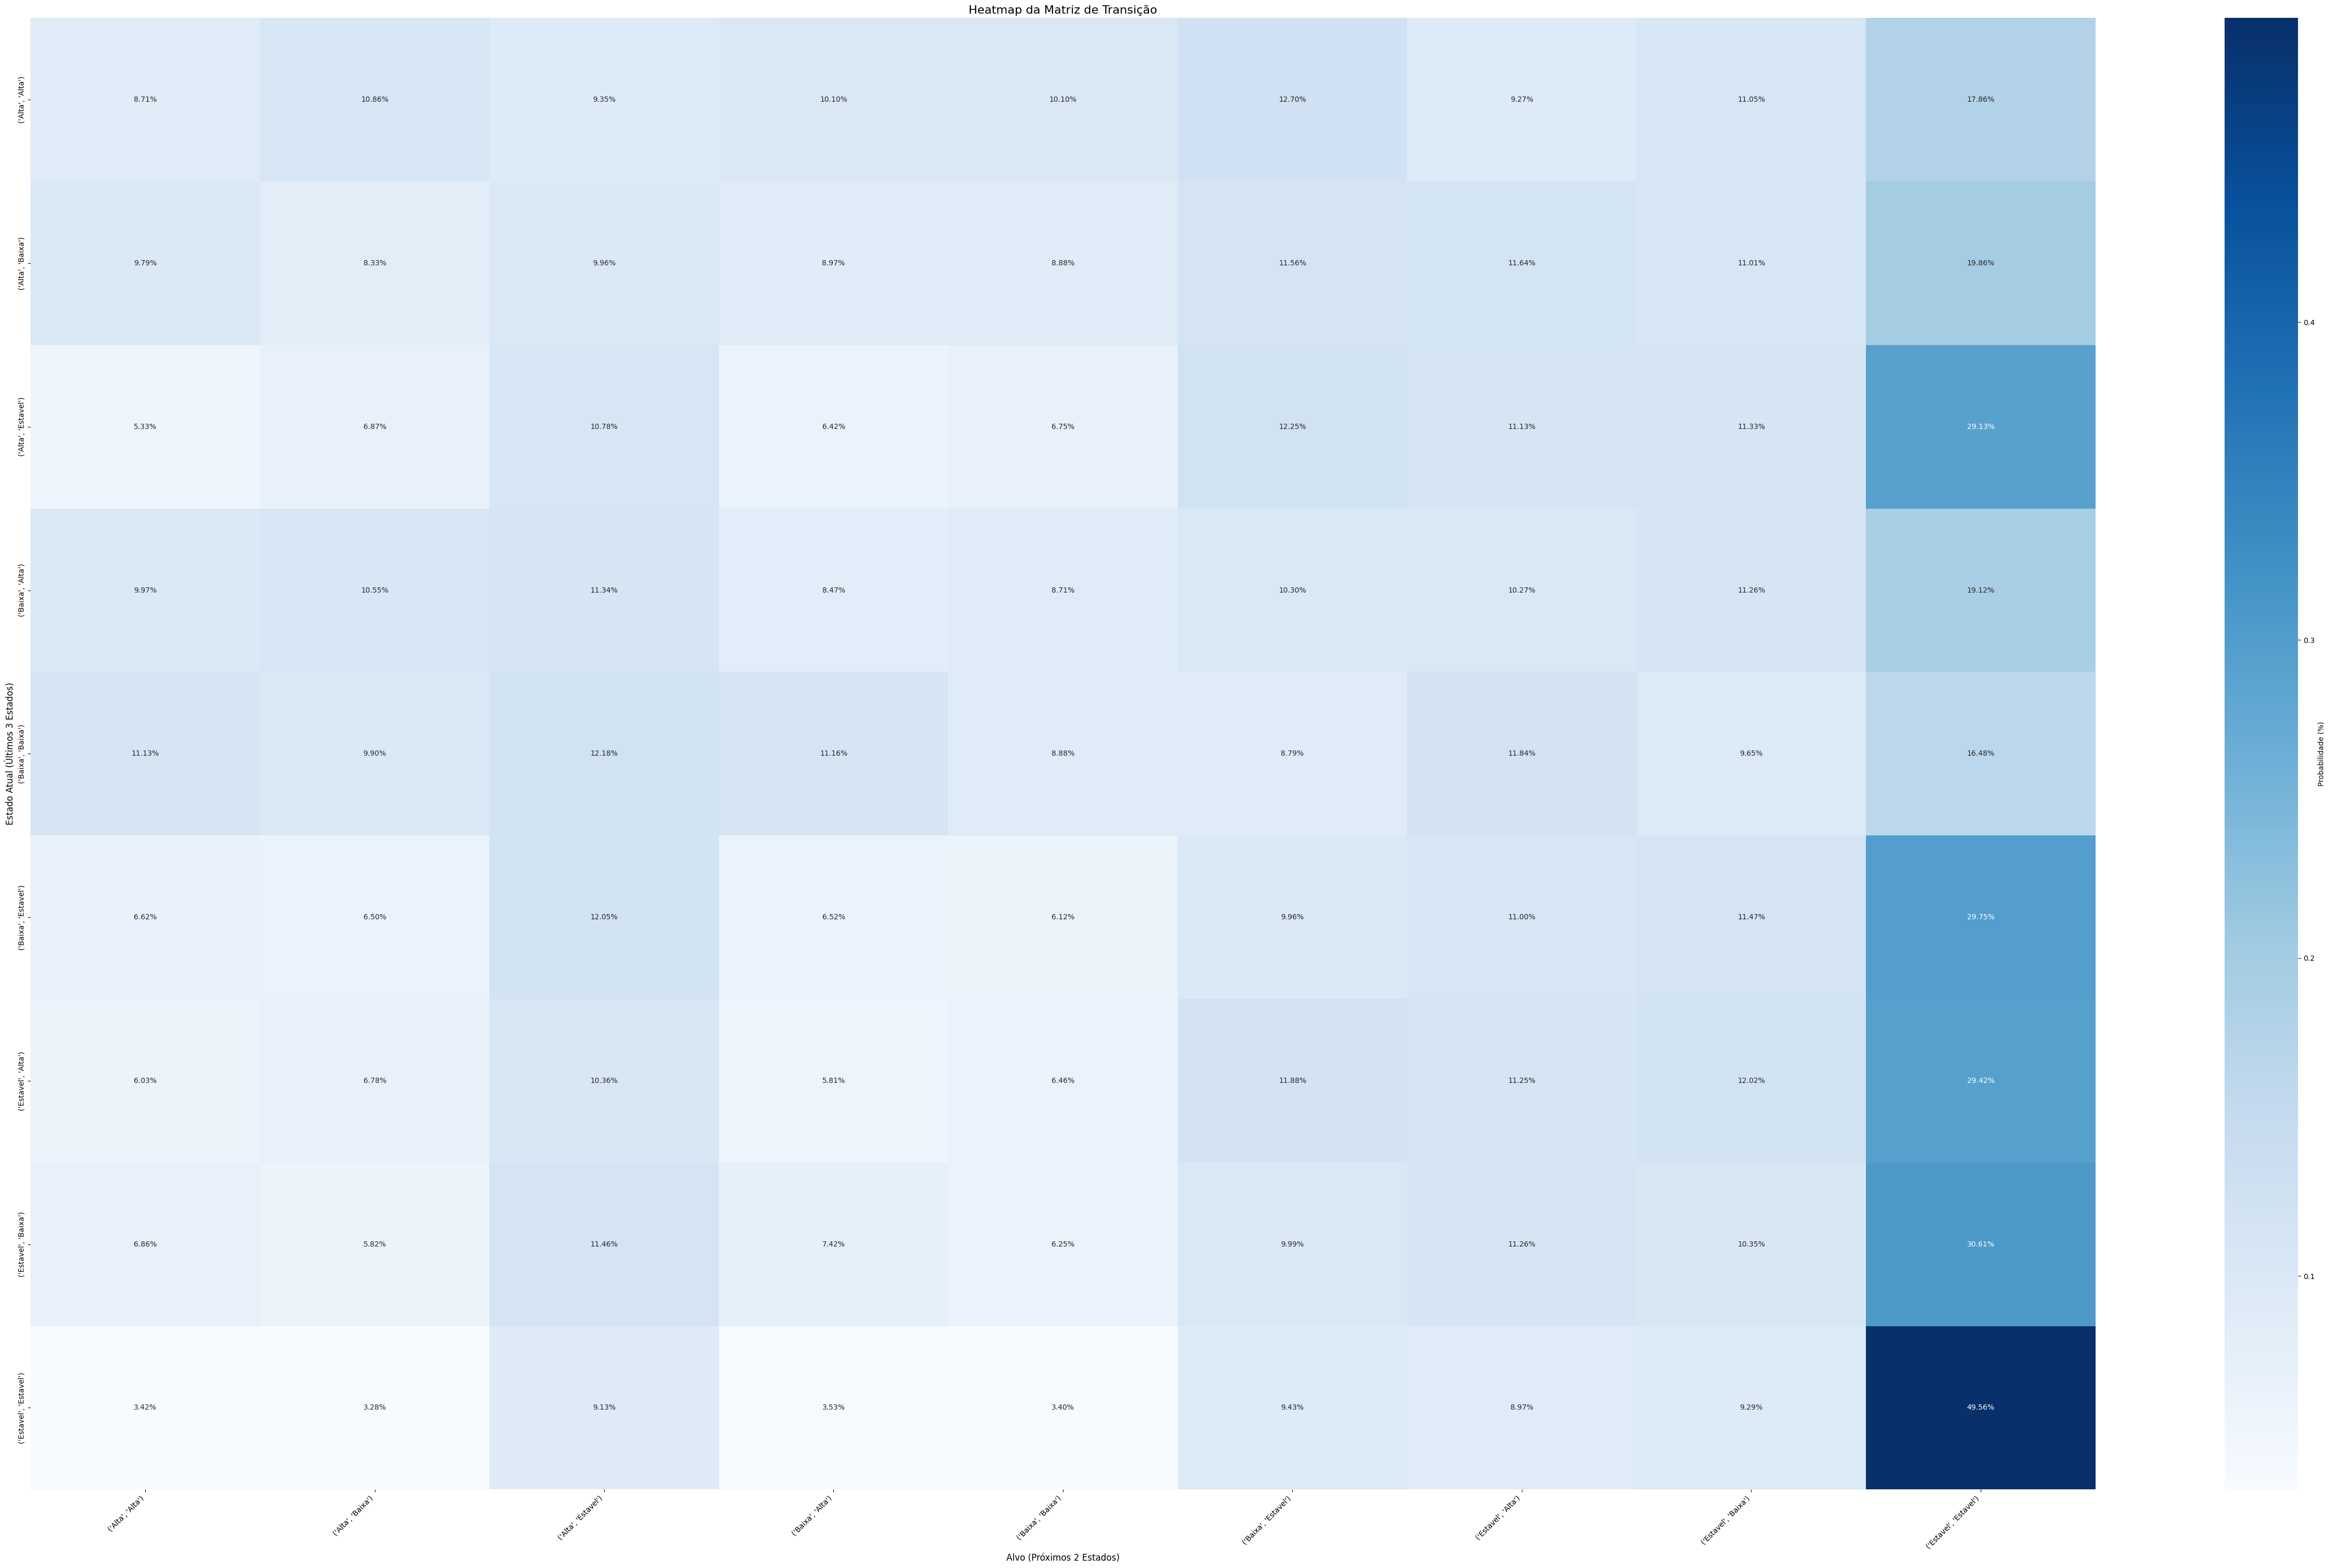

In [24]:
plotar_matriz_transicao_heatmap(
    matriz_transicao, 
    titulo="Heatmap da Matriz de Transição",
    largura=50,  # Aumentar a largura para visualizar melhor os números
    altura=30    # Ajustar a altura conforme necessário
)


In [25]:
def realizar_backtest(matriz_transicao, tuplas_teste):
    """
    Realiza um backtest com base na matriz de transição e tuplas de teste.

    Parâmetros:
        matriz_transicao (dict): Matriz de transição baseada nas tuplas de treinamento.
        tuplas_teste (list): Lista de tuplas com 3 estados consecutivos para teste.

    Retorna:
        dict: Métricas do backtest, como precisão.
    """
    acertos = 0
    total_transicoes = len(tuplas_teste) - 1

    for i in range(total_transicoes):
        estado_atual = tuplas_teste[i]
        estado_real = tuplas_teste[i + 1]

        if estado_atual in matriz_transicao:
            transicoes_proximas = matriz_transicao[estado_atual]
            if transicoes_proximas:
                estado_previsto = max(transicoes_proximas, key=transicoes_proximas.get)  # Estado com maior probabilidade
                if estado_previsto == estado_real:
                    acertos += 1

    precisao = acertos / total_transicoes if total_transicoes > 0 else 0
    return {
        "acertos": acertos,
        "total": total_transicoes,
        "precisao": precisao
    }

# Realizar o backtest com a matriz de transição e tuplas de teste
resultados_backtest = realizar_backtest(matriz_transicao, tuplas_teste)
print("Resultados do Backtest:", resultados_backtest)


Resultados do Backtest: {'acertos': 29316, 'total': 57646, 'precisao': 0.5085521978975124}


In [26]:
import pandas as pd

def matriz_transicao_para_dataframe(matriz_transicao):
    """
    Transforma uma matriz de transição em um DataFrame legível.

    Parâmetros:
        matriz_transicao (dict): Matriz de transição em formato de dicionário.

    Retorna:
        pd.DataFrame: DataFrame contendo as probabilidades de transição.
    """
    # Criar listas para montar o DataFrame
    estados_atual = []
    estados_proximo = []
    probabilidades = []

    # Iterar pela matriz de transição
    for estado_atual, transicoes in matriz_transicao.items():
        for estado_proximo, probabilidade in transicoes.items():
            estados_atual.append(estado_atual)
            estados_proximo.append(estado_proximo)
            probabilidades.append(probabilidade)

    # Criar o DataFrame
    df = pd.DataFrame({
        'Estado Atual': estados_atual,
        'Próximo Estado': estados_proximo,
        'Probabilidade': probabilidades
    })

    # Ordenar o DataFrame para facilitar leitura
    df = df.sort_values(by=['Estado Atual', 'Probabilidade'], ascending=[True, False])
    return df


In [27]:
df_transicao = matriz_transicao_para_dataframe(matriz_transicao)
df_transicao.head()


,Estado Atual,Próximo Estado,Probabilidade
54,"((Alta, Alta, Alta), (Alta, Alta, Alta))","((Alta, Alta, Alta), (Alta, Alta, Baixa))",0.554901
55,"((Alta, Alta, Alta), (Alta, Alta, Alta))","((Alta, Alta, Alta), (Alta, Alta, Alta))",0.445099
44,"((Alta, Alta, Alta), (Alta, Alta, Baixa))","((Alta, Alta, Alta), (Alta, Baixa, Baixa))",0.504837
45,"((Alta, Alta, Alta), (Alta, Alta, Baixa))","((Alta, Alta, Alta), (Alta, Baixa, Alta))",0.495163
26,"((Alta, Alta, Alta), (Alta, Baixa, Alta))","((Alta, Alta, Baixa), (Baixa, Alta, Baixa))",0.536207


In [41]:
matriz_transicao

{(('Baixa', 'Alta', 'Alta'),
  ('Alta', 'Alta', 'Baixa')): {(('Alta', 'Alta', 'Alta'),
   ('Alta', 'Baixa', 'Baixa')): 0.49444444444444446, (('Alta', 'Alta', 'Alta'),
   ('Alta', 'Baixa', 'Alta')): 0.5055555555555555},
 (('Alta', 'Alta', 'Alta'),
  ('Alta', 'Baixa', 'Baixa')): {(('Alta', 'Alta', 'Baixa'),
   ('Baixa', 'Baixa', 'Baixa')): 0.49745083758193737, (('Alta',
    'Alta',
    'Baixa'),
   ('Baixa', 'Baixa', 'Alta')): 0.5025491624180627},
 (('Alta', 'Alta', 'Baixa'),
  ('Baixa', 'Baixa', 'Baixa')): {(('Alta', 'Baixa', 'Baixa'),
   ('Baixa', 'Baixa', 'Alta')): 0.5253534861043393, (('Alta',
    'Baixa',
    'Baixa'),
   ('Baixa', 'Baixa', 'Baixa')): 0.47464651389566065},
 (('Alta', 'Baixa', 'Baixa'),
  ('Baixa', 'Baixa', 'Alta')): {(('Baixa', 'Baixa', 'Baixa'),
   ('Baixa', 'Alta', 'Alta')): 0.5033875338753387, (('Baixa',
    'Baixa',
    'Baixa'),
   ('Baixa', 'Alta', 'Baixa')): 0.49661246612466126},
 (('Baixa', 'Baixa', 'Baixa'),
  ('Baixa', 'Alta', 'Alta')): {(('Baixa', 'Baixa'

In [51]:
def avaliar_desempenho_por_classe_codificado(matriz_transicao, tuplas_teste):
    """
    Avalia o desempenho do modelo de Cadeia de Markov por classe após codificar os estados.

    Parâmetros:
        matriz_transicao (dict): Matriz de transição baseada nas tuplas de treinamento.
        tuplas_teste (list): Lista de tuplas com formato (estado_atual, alvo) para teste.

    Retorna:
        dict: Matriz de confusão, relatório de métricas e listas de rótulos reais e previstos.
    """
    # Criar conjunto de todos os estados
    todos_estados = set(matriz_transicao.keys()).union(
        {dest for trans in matriz_transicao.values() for dest in dest.keys()}
    )

    # Adicionar estados de tuplas_teste ao conjunto de estados
    for estado_atual, estado_real in tuplas_teste:
        todos_estados.add(estado_atual)
        todos_estados.add(estado_real)

    # Criar mapeamento para codificação
    estado_para_id = {estado: idx for idx, estado in enumerate(todos_estados)}
    id_para_estado = {idx: estado for estado, idx in estado_para_id.items()}

    # Codificar os estados no conjunto de teste
    y_true = []
    y_pred = []

    # Contadores para diagnóstico
    encontrados = 0
    nao_encontrados = 0

    for estado_atual, estado_real in tuplas_teste:
        # Previsão com base na matriz de transição
        if estado_atual in matriz_transicao:
            transicoes_proximas = matriz_transicao[estado_atual]
            if transicoes_proximas:
                estado_previsto = max(transicoes_proximas, key=transicoes_proximas.get)
                encontrados += 1
            else:
                estado_previsto = None
                nao_encontrados += 1
        else:
            estado_previsto = None
            nao_encontrados += 1

        # Codificar os estados reais e previstos
        y_true.append(estado_para_id.get(estado_real, -1))  # -1 para estados desconhecidos
        y_pred.append(estado_para_id.get(estado_previsto, -1))

    print(f"Estados encontrados na matriz de transição: {encontrados}")
    print(f"Estados não encontrados na matriz de transição: {nao_encontrados}")

    # Filtrar rótulos válidos
    y_true = [yt for yt in y_true if yt != -1]
    y_pred = [yp for yp in y_pred if yp != -1]

    # Garantir consistência no número de amostras
    if len(y_true) == 0 or len(y_pred) == 0:
        raise ValueError("Nenhum estado válido encontrado em `y_true` ou `y_pred`. Verifique os dados e a matriz de transição.")

    # Determinar rótulos presentes
    labels_presentes = sorted(set(y_true) | set(y_pred))

    # Criar matriz de confusão e relatório
    matriz_confusao = confusion_matrix(y_true, y_pred, labels=labels_presentes)
    relatorio = classification_report(
        y_true, 
        y_pred, 
        labels=labels_presentes, 
        target_names=[str(id_para_estado[label]) for label in labels_presentes]
    )

    return {
        "matriz_confusao": matriz_confusao,
        "relatorio": relatorio,
        "classes": [id_para_estado[label] for label in labels_presentes],
        "y_true": [id_para_estado[yt] for yt in y_true],
        "y_pred": [id_para_estado[yp] for yp in y_pred]
    }


In [52]:
resultados_avaliacao_codificados = avaliar_desempenho_por_classe_codificado(matriz_transicao, tuplas_teste)

UnboundLocalError: cannot access local variable 'dest' where it is not associated with a value

In [32]:
y_pred = resultados_avaliacao_codificados["y_pred"]
y_true = resultados_avaliacao_codificados["y_true"]

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plotar_matriz_confusao(y_true, y_pred, labels, titulo="Matriz de Confusão"):
    """
    Plota a matriz de confusão como uma matriz de calor.

    Parâmetros:
        y_true (list): Lista de valores reais.
        y_pred (list): Lista de valores previstos.
        labels (list): Lista de rótulos para os estados.
        titulo (str): Título do gráfico.
    """
    # Criar a matriz de confusão
    matriz = confusion_matrix(y_true, y_pred, labels=labels)

    # Configurar o tamanho da figura
    plt.figure(figsize=(10, 8))

    # Plotar matriz como heatmap
    sns.heatmap(
        matriz, 
        annot=True, 
        fmt='d', 
        cmap='Blues', 
        xticklabels=labels, 
        yticklabels=labels,
        cbar=True
    )

    # Configurações do gráfico
    plt.title(titulo)
    plt.xlabel('Previsto')
    plt.ylabel('Real')
    plt.xticks(rotation=45)
    plt.yticks(rotation=45)
    plt.tight_layout()
    plt.show()


In [34]:
# Obter os rótulos das classes
labels = resultados_avaliacao_codificados["classes"]

# labels

In [35]:
def plotar_matriz_confusao_decodificada(y_true, y_pred, labels, titulo="Matriz de Confusão"):
    """
    Plota a matriz de confusão como uma matriz de calor, decodificando rótulos numéricos.

    Parâmetros:
        y_true (list): Lista de valores reais codificados.
        y_pred (list): Lista de valores previstos codificados.
        labels (list): Lista de rótulos originais (tuplas) decodificados.
        titulo (str): Título do gráfico.
    """
    # Criar a matriz de confusão
    matriz = confusion_matrix(y_true, y_pred, labels=range(len(labels)))

    # Configurar o tamanho da figura
    plt.figure(figsize=(12, 10))

    # Plotar matriz como heatmap
    sns.heatmap(
        matriz,
        annot=True,
        fmt='d',
        cmap='Blues',
        xticklabels=labels,
        yticklabels=labels,
        cbar=True
    )

    # Configurações do gráfico
    plt.title(titulo)
    plt.xlabel('Previsto')
    plt.ylabel('Real')
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()


In [36]:
# Rótulos originais (tuplas decodificadas)
labels = resultados_avaliacao_codificados["classes"]

# Plotar a matriz de confusão decodificada
plotar_matriz_confusao_decodificada(
    y_true=resultados_avaliacao_codificados["y_true"],
    y_pred=resultados_avaliacao_codificados["y_pred"],
    labels=[str(label) for label in labels],  # Converter tuplas para strings
    titulo="Matriz de Confusão da Cadeia de Markov"
)


ValueError: 'labels' should contains at least one label.